# Convolutional neural networks in Python using keras 

We herein present an example of implementation and fitting of convolutional neural networks (CNNs). 

## Load Keras and load datasets

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
# Load the Fashion-MNIST dataset
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Using Numpy for checking the data

In [17]:
print('Training data dimensions: ', train_X.shape, train_Y.shape)

print('Testing data dimensions: ', test_X.shape, test_Y.shape)

Training data dimensions:  (60000, 28, 28) (60000,)
Testing data dimensions:  (10000, 28, 28) (10000,)


In [18]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Using Matplotlib to plot some graphics

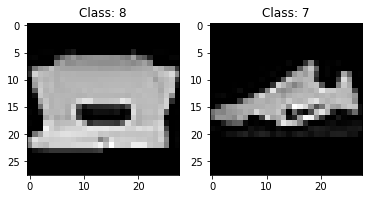

In [19]:
# first subplot
plt.subplot(121)
plt.imshow(train_X[999,:,:], cmap='gray')
plt.title("Class: {}".format(train_Y[999]))

# second subplot
plt.subplot(122)
plt.imshow(test_X[999,:,:], cmap='gray')
plt.title("Class: {}".format(test_Y[999]))

plt.show()

### Notes on Fashion-MNIST classes:
- 0: t-shirts, 
- 1: trousers, 
- 2: pullovers, 
- 3: dresses, 
- 4: coats, 
- 5: sandals, 
- 6: shirts, 
- 7: sneakers, 
- 8: bags, 
- 9: ankle boots.

## Using Numpy for data preprocessing...

In [20]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [21]:
# -1: the value for this dimension is inferred 
train_X = train_X.reshape(-1, 28,28,1)
test_X = test_X.reshape(-1, 28,28,1)
print(train_X.shape, test_X.shape)

# convert in float32 (more memory allocated)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# scale to 0-1, note the . after 255 (float)
train_X = train_X / 255.
test_X = test_X / 255.

(60000, 28, 28, 1) (10000, 28, 28, 1)


## ...and Keras

In [22]:
print('y:', train_Y[0])

train_Y = keras.utils.to_categorical(train_Y)
test_Y = keras.utils.to_categorical(test_Y)

print('y in binary representation:', train_Y[0])
print(train_Y.shape)

y: 9
y in binary representation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 10)


## Your first CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [23]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,LeakyReLU
from keras.utils import plot_model

batch_size = 1000 # try other values
epochs = 5 # try other values
num_classes = 10

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(num_classes, activation='softmax')) 

In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = "sgd",
              metrics='accuracy')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)       

In [27]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
train = model.fit(train_X, train_Y, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  verbose=1, 
                  validation_split = 0.2)

Epoch 1/5
48/48 [==============================] - 10s 198ms/step - loss: 2.2274 - accuracy: 0.2205 - val_loss: 2.1600 - val_accuracy: 0.3352
Epoch 2/5
48/48 [==============================] - 8s 176ms/step - loss: 2.0628 - accuracy: 0.4273 - val_loss: 1.9244 - val_accuracy: 0.5108
Epoch 3/5
48/48 [==============================] - 9s 189ms/step - loss: 1.7297 - accuracy: 0.5597 - val_loss: 1.4973 - val_accuracy: 0.6160
Epoch 4/5
48/48 [==============================] - 11s 225ms/step - loss: 1.3169 - accuracy: 0.6380 - val_loss: 1.1502 - val_accuracy: 0.6662
Epoch 5/5
48/48 [==============================] - 22s 458ms/step - loss: 1.0719 - accuracy: 0.6676 - val_loss: 0.9854 - val_accuracy: 0.6892


In [29]:
model.save("my_model") # save the model (save structure and fit)
del model # delete the model

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [30]:
# Recreate the exact same model purely from the file:
model = keras.models.load_model("my_model") 

In [31]:
test_eval = model.evaluate(test_X, test_Y, verbose=0)

In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.0100698471069336
Test accuracy: 0.6735000014305115


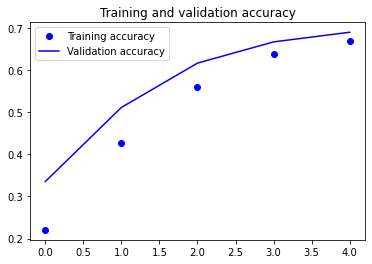

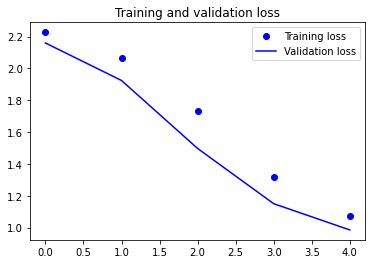

In [33]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Your second CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [34]:
batch_size = 100 #(may be reduced)
epochs = 10 #(may be increased)
num_classes = 10 

## Dropout (controlling for overfitting)

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd",metrics='accuracy')

In [38]:
train_dropout = model.fit(train_X, train_Y,
                          epochs=epochs,
                          verbose=1, 
                          validation_split = 0.2)

Epoch 1/10


1500/1500 [==============================] - 23s 14ms/step - loss: 1.1693 - accuracy: 0.5724 - val_loss: 0.7362 - val_accuracy: 0.7281
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.7660 - accuracy: 0.7190 - val_loss: 0.6541 - val_accuracy: 0.7617
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6896 - accuracy: 0.7474 - val_loss: 0.5995 - val_accuracy: 0.7797
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6507 - accuracy: 0.7628 - val_loss: 0.5840 - val_accuracy: 0.7918
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.6189 - accuracy: 0.7764 - val_loss: 0.5474 - val_accuracy: 0.8074
Epoch 6/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.5958 - accuracy: 0.7847 - val_loss: 0.5297 - val_accuracy: 0.8124
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5748 - accuracy: 0.7928 - val_loss: 0.5110 - val_accura

As you may see the results are not quite satisfactory in terms of training accuracy... these models are known to easily raise 95% of accuracy, the dropout layer is sensed to avoid overfitting but maybe our model estimation did not converge well. 

Now try to improve both these models and print the results of the second model. First, try to change the values of tuning parameters `batch_size` and `epochs`. Then, once you will get better performance results for both these models, you could propose your own network architecture using fully and locally connected layers.

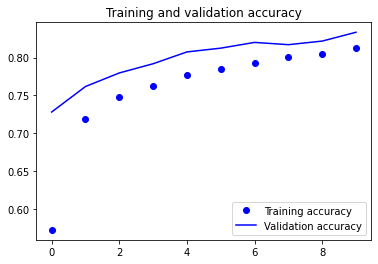

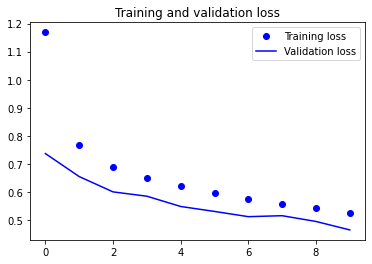

In [39]:
accuracy = train_dropout.history['accuracy']
val_accuracy = train_dropout.history['val_accuracy']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

An example of simple structure with good performance: https://www.pycodemates.com/2023/04/coding-neural-network-using-tensorflow-and-keras-.html?utm_content=cmp-true